# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
city_ride_count = pyber_data_df.groupby('city').count()['ride_id']
print(city_ride_count.index)
city_ride_count


Index(['Amandaburgh', 'Barajasview', 'Barronchester', 'Bethanyland',
       'Bradshawfurt', 'Brandonfort', 'Carriemouth', 'Christopherfurt',
       'Colemanland', 'Davidfurt',
       ...
       'West Heather', 'West Heidi', 'West Josephberg', 'West Kimmouth',
       'West Patrickchester', 'West Robert', 'West Samuelburgh',
       'Williamsonville', 'Williamsstad', 'Williamsview'],
      dtype='object', name='city', length=120)


city
Amandaburgh         18
Barajasview         22
Barronchester       16
Bethanyland         18
Bradshawfurt        10
                    ..
West Robert         31
West Samuelburgh    25
Williamsonville     14
Williamsstad        23
Williamsview        20
Name: ride_id, Length: 120, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
city_driver = city_data_df.groupby(['city']).sum()['driver_count']
city_driver

city
Amandaburgh         12
Barajasview         26
Barronchester       11
Bethanyland         22
Bradshawfurt         7
                    ..
West Robert         39
West Samuelburgh    73
Williamsonville      2
Williamsstad        59
Williamsview        46
Name: driver_count, Length: 120, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_city_fares = pyber_data_df.groupby(['city']).sum()['fare']
total_city_fares

city
Amandaburgh         443.55
Barajasview         557.31
Barronchester       582.76
Bethanyland         593.21
Bradshawfurt        400.64
                     ...  
West Robert         778.84
West Samuelburgh    544.19
Williamsonville     446.25
Williamsstad        560.33
Williamsview        531.98
Name: fare, Length: 120, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_city_fares/city_ride_count
average_fare_per_ride

city
Amandaburgh         24.641667
Barajasview         25.332273
Barronchester       36.422500
Bethanyland         32.956111
Bradshawfurt        40.064000
                      ...    
West Robert         25.123871
West Samuelburgh    21.767600
Williamsonville     31.875000
Williamsstad        24.362174
Williamsview        26.599000
Length: 120, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_city_fares / city_driver
average_fare_per_driver

city
Amandaburgh          36.962500
Barajasview          21.435000
Barronchester        52.978182
Bethanyland          26.964091
Bradshawfurt         57.234286
                       ...    
West Robert          19.970256
West Samuelburgh      7.454658
Williamsonville     223.125000
Williamsstad          9.497119
Williamsview         11.564783
Length: 120, dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
summary_ride_count = pyber_data_df.groupby(['type']).count()['ride_id']
summary_ride_count = summary_ride_count.rename("Total Rides")
#print(summary_ride_count)

summary_driver = city_data_df.groupby(['type']).sum()['driver_count']
summary_driver = summary_driver.rename("Total Driver")
#print(summary_driver)

summary_total_city_fares = pyber_data_df.groupby(['type']).sum()['fare']
summary_total_city_fares = summary_total_city_fares.rename("Total Fares")
#print(summary_total_city_fares)

summary_average_fare_per_ride = summary_total_city_fares/summary_ride_count
summary_average_fare_per_ride = summary_average_fare_per_ride.rename("Average Fare Per Rider")
#print(summary_average_fare_per_ride)

summary_average_fare_per_driver = summary_total_city_fares / summary_driver
summary_average_fare_per_driver = summary_average_fare_per_driver.rename("Average Fare Per Driver")
#print(summary_average_fare_per_driver)

pyber_summary_df = pd.concat([summary_ride_count,summary_driver,summary_total_city_fares,summary_average_fare_per_ride,summary_average_fare_per_driver],axis=1)


pyber_summary_df

,Total Rides,Total Driver,Total Fares,Average Fare Per Rider,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Driver,Total Fares,Average Fare Per Rider,Average Fare Per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
#pyber_summary_df.style.format(formatter = {('Total Rides'): "{:.2f}"})
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,}".format)
pyber_summary_df['Total Driver'] = pyber_summary_df['Total Driver'].map("{:,}".format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("${:,.2f}".format)
pyber_summary_df['Average Fare Per Rider'] = pyber_summary_df['Average Fare Per Rider'].map("${:,.2f}".format)
pyber_summary_df['Average Fare Per Driver'] = pyber_summary_df['Average Fare Per Driver'].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Driver,Total Fares,Average Fare Per Rider,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
newdf = pyber_data_df.groupby(['type','date']).sum()['fare']
newdf

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
newdf = newdf.reset_index()
newdf

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
new_df_pivot = newdf.pivot(index=['date'],columns=['type'], values=['fare'])
new_df_pivot.head(10)


fare                
type                 Rural Suburban  Urban
date                                      
2019-01-01 00:08:16    NaN      NaN  37.91
2019-01-01 00:46:46    NaN    47.74    NaN
2019-01-01 02:07:24    NaN    24.07    NaN
2019-01-01 03:46:50    NaN      NaN   7.57
2019-01-01 05:23:21    NaN      NaN  10.75
2019-01-01 09:45:36  43.69      NaN    NaN
2019-01-01 12:32:48    NaN    25.56    NaN
2019-01-01 14:40:14    NaN      NaN   5.42
2019-01-01 14:42:25    NaN      NaN  12.31
2019-01-01 14:52:06    NaN    31.15    NaN

In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
filtered_pivot = new_df_pivot.loc[(new_df_pivot.index >= "2019-01-01") & (new_df_pivot.index <= "2019-04-29")]
filtered_pivot




fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
filtered_pivot.index = pd.to_datetime(filtered_pivot.index)
filtered_pivot

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
filtered_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  573 non-null    float64
 2   (fare, Urban)     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pivot_by_weeks = filtered_pivot
pivot_by_weeks = pivot_by_weeks.resample('W').sum()
pivot_by_weeks

fare                  
type         Rural Suburban    Urban
date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

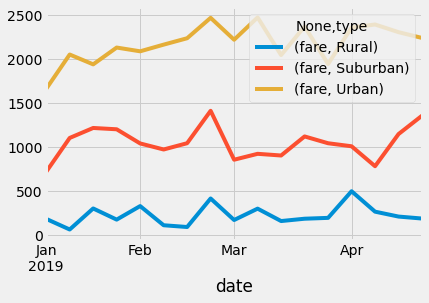

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.

from matplotlib import style

# Use the graph style fivethirtyeight.

style.use('fivethirtyeight')

pivot_by_weeks.plot()

plt.savefig('Resources/PyBer_fare_summary.png')